In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control

In [2]:
rand = np.random.rand

In [3]:
def one_random_real(r=-10):
    """Generate one random real pole or zero with maximum radius r.  
    If r is negative, the pole or zero will be stable or in the left half plane.
    If r is positive, the pole will be unstable or the zero will be non-minimum phase
    (i.e. in the right half plane)"""
    return r*rand()

In [4]:
def random_real_poles(N):
    """Generate a list of random real poles, possibly including a pure integrator,
    a pure double integrator, or one unstable pole"""
    poles = []
    nr = N# number of poles remaining to generate
    
    # decide if pure integrator or not and possibly pure double int
    r1 = rand()
    num_int = 0
    #print('r1 = %0.4g' % r1)
    if r1 < 0.3:
        # at least one pure int
        num_int = 1
        if N > 1:
            # possible double int
            r2 = rand()
            if r2 < 0.2:
                num_int = 2
                
    if num_int > 0:
        poles = [0]*num_int
        nr = N-num_int
        
    if nr == 0:
        #exit
        return poles
    
    # decide if unstable pole is present
    r_us = rand()
    if r_us < 0.15:
        # one unstable pole
        p_us = one_random_real(r=5)
        poles.append(p_us)
        nr -= 1# decrement number of remaining poles
        
    if nr == 0:
        #exit
        return poles
    
    # generate remaining random, stable poles that are not 
    # pure integrators
    
    for i in range(nr):
        p_i = one_random_real(r=-10)-0.5# shift 0.5 away from the origin for
                                        # these poles so they avoid being nearly 
                                        # pure integrators
        poles.append(p_i)
        
    return poles

In [5]:
np.floor(np.array(random_real_poles(3))*2)*0.5

array([ 0. , -4.5, -1.5])

In [6]:
def random_poles():
    """Determine how many poles to include and generate 
    a random list of poles including the possibility of one
    complex conjugate pair."""
    
    # Number of poles
    N = int(5*rand())+1# up to five poles
    #print('N = %i' % N)
    
    r_c = rand()
    if r_c < 0.4:
        # yes, complex pair
        wn = 10*rand()
        z = 0.05 + 0.7*rand()
        wd = wn*np.sqrt(1-z**2)
        cp1 = -z*wn+1.0j*wd
        cp2 = -z*wn-1.0j*wd
        poles = [cp1,cp2]
        if N == 1:
            nr = 0# number of poles remaining to generate
        else:
            nr = N-2
    else:
        poles = []
        nr = N
        
    if nr == 0:
        #exit
        return poles

    #print('nr = %i' % nr)
    real_poles = random_real_poles(nr)
    real_poles2 = np.floor(np.array(real_poles)*2)*0.5
    poles.extend(real_poles2)
    
    return poles

In [7]:
def random_zeros(poles):
    """Generate a random list of zeros.  The list may be empty if number
    of zeros is 0.  Do not allow a pure integrator if there is a pure
    integrator.  Do not allow a LHP zero if there is an unstable pole."""
    n = len(poles)# number of poles
    m = int(n*rand())# number of zeros
    zeros = []
    nzr = m# number of zeros remaining to generate
    
    if m == 0:
        #exit
        return zeros
    
    if np.min(abs(np.array(poles))) > 0.3:
        # allow pure differentiator only if there is not pure integrator
        r_pd = rand()
        if r_pd < 0.25:
            zeros=[0]
            nzr -= 1
            
    if nzr == 0:
        #exit
        return zeros
    
    if np.max(poles) <= 0:
        # allow the possibility of a non-minimum phase (RHP) zero if 
        # none of the poles are unstable
        r_nmp = rand()
        if r_nmp < 0.25:
            zero = one_random_real(r=5)
            zeros.append(zero)
            nzr -= 1
            
    if nzr == 0:
        #exit
        return zeros       
    
    for i in range(nzr):
        z_i = one_random_real(r=-7)-0.5# shift 0.5 away from the origin for
                                        # these poles so they avoid being nearly 
                                        # pure integrators
        zeros.append(z_i)
        
    return zeros

In [8]:
def random_transfer_function():
    """Generate a random transfer function for root locus practice."""
    poles = random_poles()
    zeros = random_zeros(poles)
    zeros2 = np.floor(np.array(zeros)*2)*0.5
    num = np.poly(zeros2)
    den = np.poly(poles)
    G = control.TransferFunction(num,den)
    return G

In [23]:
G = random_transfer_function()
G


                      s
----------------------------------------------
s^5 + 19 s^4 + 137 s^3 + 473 s^2 + 786 s + 504

(-20, 2)

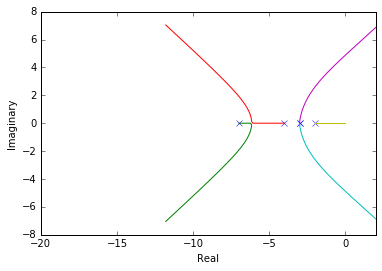

In [24]:
kvect = np.logspace(-4,4,1000)
out = control.root_locus(G,kvect)
plt.xlim([-20,2])